In [1]:
from pymatgen.io.vasp import Xdatcar
from pymatgen.analysis.diffusion_analyzer import DiffusionAnalyzer
from vasppy.rdf import VanHoveAnalysis
import matplotlib.pyplot as plt
import numpy as np
import yaml

import sys
sys.path.insert(0, "../../scripts/")
from utils import flatten_list, get_structures, indices_by_species


In [2]:
with open('../md_runs.yaml', 'r') as f:
    md_runs = yaml.load(f)
print(md_runs)

{'Li6PS5I': {'0p': [1, 2, 3, 4, 5, 6], '50p': [1, 2, 3, 4, 5, 6, 7], '100p': [1, 2, 3, 4, 5, 6, 7]}, 'Li6PS5Cl': {'0p': [1, 2, 3, 4, 5], '50p': [1, 2, 3, 4, 5, 6], '100p': [1, 2, 3, 4, 5, 6]}}


In [3]:
data_dir = '../../data'
dt = [ 1, 5, 10, 50, 100, 200, 300, 400, 500 ]

vh_data = {}
for system in md_runs:
    vh_data[system] = {}
    for disorder, runs in md_runs[system].items():
        vh_data[system][disorder] = {}
        xdatcar_filenames = [ f'{data_dir}/{system}/{disorder}/run{i}/inherent_XDATCAR.gz' for i in runs ]
        xdatcars = ( Xdatcar( f ) for f in xdatcar_filenames )
        structures = flatten_list( [ x.structures for x in xdatcars ] )
        li_indices = indices_by_species( structures[0], 'Li' )
        print(f'{system} {disorder} inherent')
        for i in dt:
            vh_data[system][disorder][i] = VanHoveAnalysis( structures, li_indices, r_max=12.0, d_steps=i )

Li6PS5I 0p inherent
Li6PS5I 50p inherent
Li6PS5I 100p inherent
Li6PS5Cl 0p inherent
Li6PS5Cl 50p inherent
Li6PS5Cl 100p inherent


/Users/bjm42/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


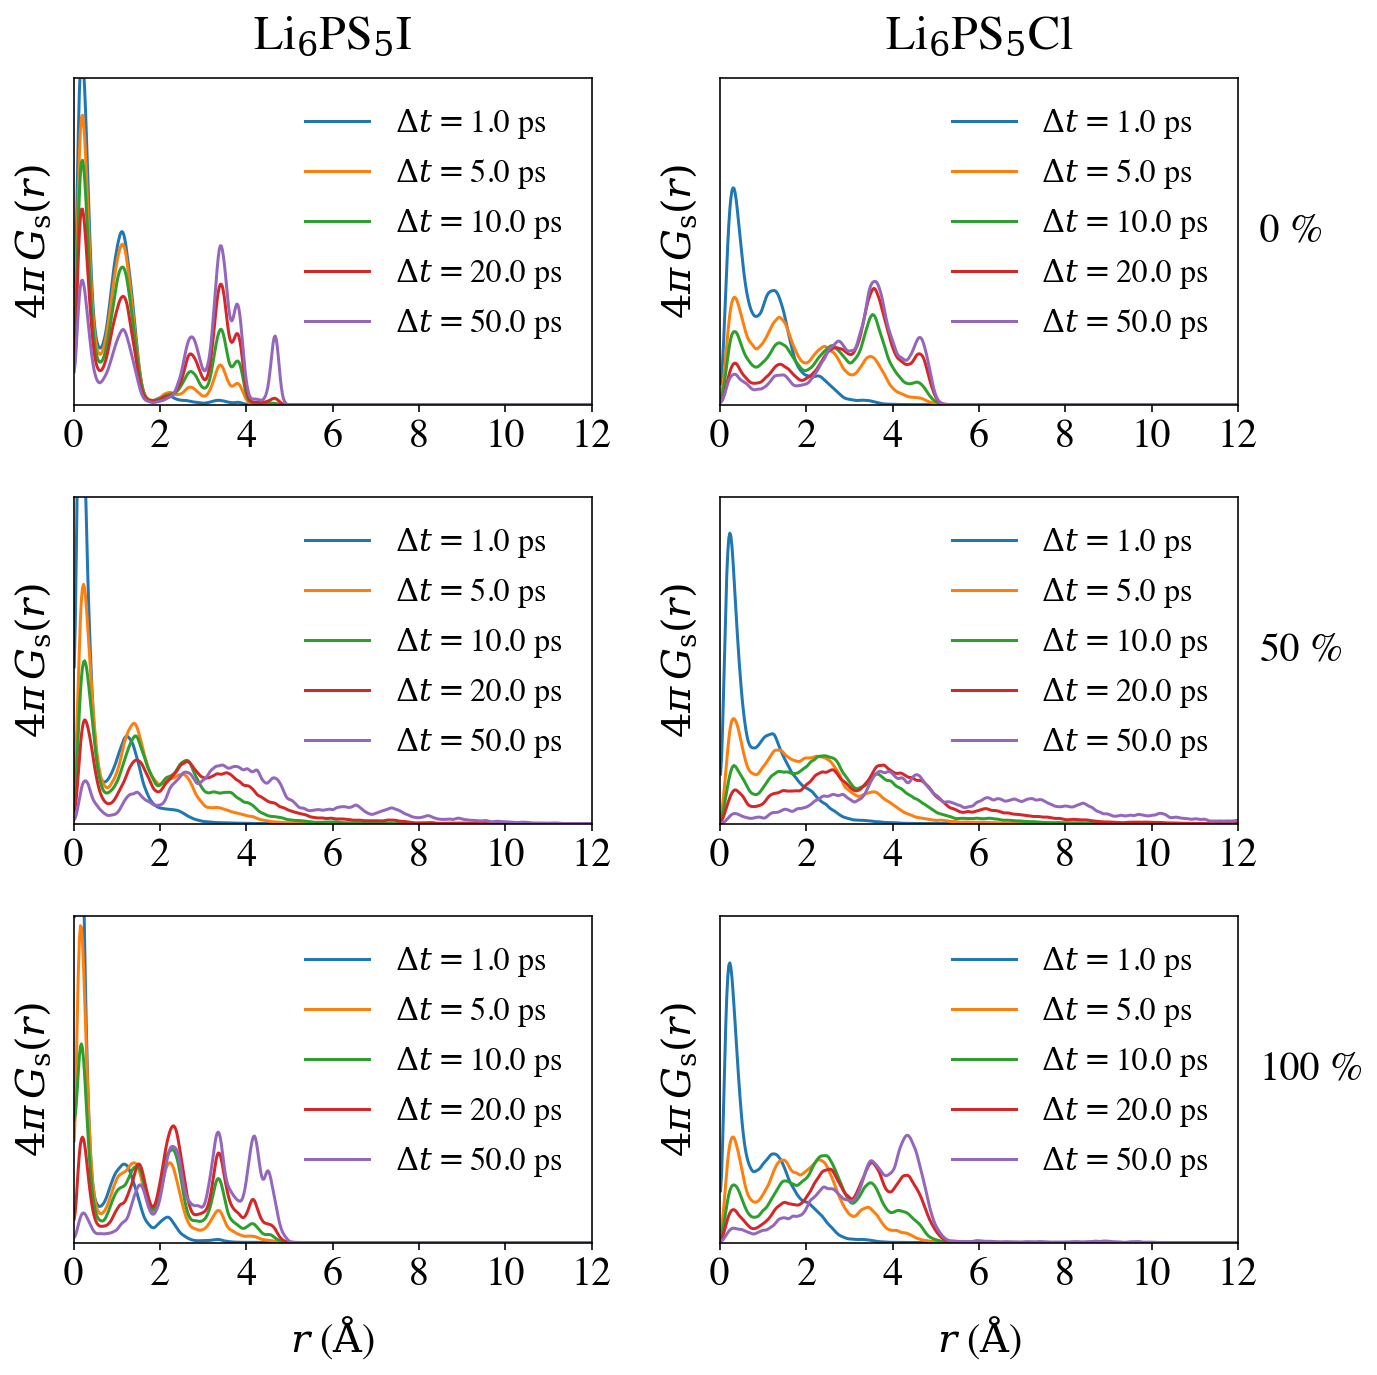

In [17]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Minion Pro']
rcParams['font.size'] = 20
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['mathtext.fontset'] = 'dejavuserif'

def plot_vh(vh, axes, sigma, label=None):
    axes.plot(vh.r, vh.self(sigma=sigma), label=label)
              
sigma = 0.05
fig, ax = plt.subplots(3,2,figsize=(10,10))

for i in [10, 50, 100, 200, 500]:
    label = r'$\Delta t =$' + str(i/10) + ' ps'
    plot_vh(vh_data['Li6PS5I']['0p'][i], axes=ax[0,0], sigma=sigma, label=label)
    plot_vh(vh_data['Li6PS5I']['50p'][i], axes=ax[1,0], sigma=sigma, label=label)
    plot_vh(vh_data['Li6PS5I']['100p'][i], axes=ax[2,0], sigma=sigma, label=label)
    plot_vh(vh_data['Li6PS5Cl']['0p'][i], axes=ax[0,1], sigma=sigma, label=label)
    plot_vh(vh_data['Li6PS5Cl']['50p'][i], axes=ax[1,1], sigma=sigma, label=label)
    plot_vh(vh_data['Li6PS5Cl']['100p'][i], axes=ax[2,1], sigma=sigma, label=label)

y_max = 1.5
for i in range(3):
    for j in range(2):
        ax[i,j].set_ylim([0,y_max])
        ax[i,j].set_xlim([0,12])
        ax[i,j].set_yticks([])
        ax[i,j].legend(fancybox=False, fontsize=16, frameon=False)
        
# for i in range(2):
#     for j in range(2):
#         ax[i,j].get_xaxis().set_visible(False)
        
# for i in range(3):
#         ax[i,1].get_yaxis().set_visible(False)

xlabel = r'$r$ ($\mathrm{\AA}$)'
ylabel = r'$4\pi\,G_\mathrm{s}(r)$'
for i in range(3):
    for j in range(2):
        ax[i,j].set_xticks(range(0,13,2))
        ax[i,j].set_ylabel(ylabel, labelpad=10)
ax[2,0].set_xlabel(xlabel, labelpad=10)
ax[2,1].set_xlabel(xlabel, labelpad=10)
        
ax[0,0].set_title(r'Li$_6$PS$_5$I', pad=15)
ax[0,1].set_title(r'Li$_6$PS$_5$Cl', pad=15)

ax[0,1].text(12.5,y_max/2,'0 %')
ax[1,1].text(12.5,y_max/2,'50 %')
ax[2,1].text(12.5,y_max/2,'100 %')
    
fig.tight_layout()    
# fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('../../figures/self-VanHove.pdf', bbox_inches='tight')
fig.show()

In [ ]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Minion Pro']
rcParams['font.size'] = 16
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['mathtext.fontset'] = 'dejavuserif'

def plot_vh(vh, axes, sigma, label=None):
    axes.plot(vh.r, vh.distinct(sigma=sigma), label=label)
              
sigma = 0.1
fig, ax = plt.subplots(3,2,figsize=(10,10))

for i in [1, 5, 10]:
    label = r'$\Delta t =$' + str(i/10) + ' ps'
    plot_vh(vh_data['Li6PS5I']['0p'][i], axes=ax[0,0], sigma=sigma, label=label)
    plot_vh(vh_data['Li6PS5I']['50p'][i], axes=ax[1,0], sigma=sigma, label=label)
    plot_vh(vh_data['Li6PS5I']['100p'][i], axes=ax[2,0], sigma=sigma, label=label)
    plot_vh(vh_data['Li6PS5Cl']['0p'][i], axes=ax[0,1], sigma=sigma, label=label)
    plot_vh(vh_data['Li6PS5Cl']['50p'][i], axes=ax[1,1], sigma=sigma, label=label)
    plot_vh(vh_data['Li6PS5Cl']['100p'][i], axes=ax[2,1], sigma=sigma, label=label)

y_max = 3
for i in range(3):
    for j in range(2):
        ax[i,j].set_ylim([0,y_max])
        ax[i,j].set_xlim([0,10])
        ax[i,j].set_yticks([])
        ax[i,j].legend(fancybox=False)
        
# for i in range(2):
#     for j in range(2):
#         ax[i,j].get_xaxis().set_visible(False)
        
# for i in range(3):
#         ax[i,1].get_yaxis().set_visible(False)

xlabel = r'$r$ ($\mathrm{\AA}$)'
ylabel = r'$4\pi\,G_\mathrm{d}(r)$'
for i in range(3):
    for j in range(2):
        ax[i,j].set_xticks(range(0,11,2))
        ax[i,j].set(ylabel=ylabel)
ax[2,0].set(xlabel=xlabel)
ax[2,1].set(xlabel=xlabel)
        
ax[0,0].set_title(r'Li$_6$PS$_5$I', pad=15)
ax[0,1].set_title(r'Li$_6$PS$_5$Cl', pad=15)

ax[0,1].text(10.2,y_max/2,'0 %')
ax[1,1].text(10.2,y_max/2,'50 %')
ax[2,1].text(10.2,y_max/2,'100 %')
    
fig.tight_layout()    
# fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('../../figures/distinct-VanHove.pdf', tight_layout=True)
fig.show()